# Regressão linear com Gradiente Descendente


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. Definição da função objetivo

A função objetivo é definida como:

### $f(x)= \sum_{i=1}^{n} \frac{(ax + b - y_i)^{2}}{n}$

In [2]:
def fobj (Y, X, a, b):
    
    z= 1.0/(2 * len(X))
    f= []
    
    for i in range(0, len(X)):
    
        f.append(z * ((((a * X[i]) + b - Y[i])**2)))
        
    f = sum(f)
    
    return f

#### 2. Definição da derivada da função objetivo
As derivadas da função objetivo são feitas em relação aos parâmetros que desejamos estimar (a,b). Estas derivadas são responsáveis pelo incremento durante o processo iterativo de atualização dos parâmetros. Estas derivadas são dadas por:

### $\frac{\partial f(x)}{\partial  a}= 2\times{\sum_{i=1}^{n} \frac{(ax + b - y_i)x}{n}}$
### $\frac{\partial f(x)}{\partial  b}= 2\times{\sum_{i=1}^{n} \frac{(ax + b - y_i)}{n}}$

In [3]:
def Df (Y, X, a, b):
    
    da, db = [], []
    for i in range(0, len(X)):
        
        da.append((((-Y[i] + (a * X[i]) + b) * X[i]))/len(X))
        db.append(((-Y[i] + (a * X[i]) + b))/len(X)) 
        
    da = sum(da)
    db = sum(db)
    
    return da, db

#### 3. Atualização dos parâmetros da equação

No processo de iteração, há a necessidade de utilizar um passo de atualização para obter um melhor controle em cada iteração. Esse termo é o $ \lambda$ das equações abaixo:

### $a_{i+1}= a_{i} -\lambda \times{\frac{\partial f(x)}{\partial  a}}$
### $b_{i+1}= b_{i} -\lambda \times{\frac{\partial f(x)}{\partial  b}}$



In [4]:
def RegressaoLinear(Y, X, num_iterations = 100, learning_rate = 0.002, a = 0.5, b = 0.1):
    
    custo= []
    
    for i in range(num_iterations):
        
       
        w = np.array([a, b]).reshape(2,)
        da, db= Df(Y, X, a, b)
        grad= np.array([da, db]).reshape(2,)
        w = w -(learning_rate * grad)
        a= w[0]
        b= w[1]
        
        print("O valor da função de custo na " + str(i + 1) + " iteração é: ", fobj(Y, X, a, b))
        custo.append(fobj(Y, X, a, b))
        
    return a, b, custo
        
        
        
        
        
    

#### 4. Predição do modelo

Uma vez que o modelo foi treinado, a partir de um conjunto de dados de treino, os parâmetros estimados (a,b) são usados para a construção do modelo linear $ f(x)= ax + b$ e com isso a função pode ser utilizada para realizar predições com um novo conjunto de dados (dados de teste)

In [5]:
def predict (X, a, b):
    
    y = a * X + b
    
    return y

#### 5. Aplicando o modelo de regressão linear para um dado conjunto de treino

In [6]:
X=np.array([10,20,30,40,50,60,70,80, 90])
Y=np.array([25,170,380,550,610,800,930,1250, 1190])


#### 6. Treinando o modelo de regressão

In [7]:
X= X.reshape(X.shape[0], 1)
Y= Y.reshape(Y.shape[0], 1)
a, b, custo= RegressaoLinear(Y, X, num_iterations= 3000, learning_rate= 0.0001, a= 1.0, b= 2.0)

O valor da função de custo na 1 iteração é:  [120053.87137815]
O valor da função de custo na 2 iteração é:  [57750.05852996]
O valor da função de custo na 3 iteração é:  [28664.32927306]
O valor da função de custo na 4 iteração é:  [15086.01551801]
O valor da função de custo na 5 iteração é:  [8747.13009752]
O valor da função de custo na 6 iteração é:  [5787.87441717]
O valor da função de custo na 7 iteração é:  [4406.35342219]
O valor da função de custo na 8 iteração é:  [3761.37664395]
O valor da função de custo na 9 iteração é:  [3460.24562723]
O valor da função de custo na 10 iteração é:  [3319.63438049]
O valor da função de custo na 11 iteração é:  [3253.95963053]
O valor da função de custo na 12 iteração é:  [3223.26797747]
O valor da função de custo na 13 iteração é:  [3208.90771399]
O valor da função de custo na 14 iteração é:  [3202.17154141]
O valor da função de custo na 15 iteração é:  [3198.99457447]
O valor da função de custo na 16 iteração é:  [3197.47917618]
O valor da f

O valor da função de custo na 190 iteração é:  [3185.71086292]
O valor da função de custo na 191 iteração é:  [3185.65077194]
O valor da função de custo na 192 iteração é:  [3185.59068348]
O valor da função de custo na 193 iteração é:  [3185.53059754]
O valor da função de custo na 194 iteração é:  [3185.47051414]
O valor da função de custo na 195 iteração é:  [3185.41043327]
O valor da função de custo na 196 iteração é:  [3185.35035493]
O valor da função de custo na 197 iteração é:  [3185.29027911]
O valor da função de custo na 198 iteração é:  [3185.23020583]
O valor da função de custo na 199 iteração é:  [3185.17013507]
O valor da função de custo na 200 iteração é:  [3185.11006684]
O valor da função de custo na 201 iteração é:  [3185.05000114]
O valor da função de custo na 202 iteração é:  [3184.98993797]
O valor da função de custo na 203 iteração é:  [3184.92987733]
O valor da função de custo na 204 iteração é:  [3184.86981922]
O valor da função de custo na 205 iteração é:  [3184.80

O valor da função de custo na 395 iteração é:  [3173.44495136]
O valor da função de custo na 396 iteração é:  [3173.38537669]
O valor da função de custo na 397 iteração é:  [3173.32580454]
O valor da função de custo na 398 iteração é:  [3173.26623489]
O valor da função de custo na 399 iteração é:  [3173.20666775]
O valor da função de custo na 400 iteração é:  [3173.14710311]
O valor da função de custo na 401 iteração é:  [3173.08754099]
O valor da função de custo na 402 iteração é:  [3173.02798137]
O valor da função de custo na 403 iteração é:  [3172.96842425]
O valor da função de custo na 404 iteração é:  [3172.90886965]
O valor da função de custo na 405 iteração é:  [3172.84931755]
O valor da função de custo na 406 iteração é:  [3172.78976796]
O valor da função de custo na 407 iteração é:  [3172.73022087]
O valor da função de custo na 408 iteração é:  [3172.6706763]
O valor da função de custo na 409 iteração é:  [3172.61113422]
O valor da função de custo na 410 iteração é:  [3172.551

O valor da função de custo na 561 iteração é:  [3163.5898219]
O valor da função de custo na 562 iteração é:  [3163.53066208]
O valor da função de custo na 563 iteração é:  [3163.47150475]
O valor da função de custo na 564 iteração é:  [3163.41234991]
O valor da função de custo na 565 iteração é:  [3163.35319756]
O valor da função de custo na 566 iteração é:  [3163.2940477]
O valor da função de custo na 567 iteração é:  [3163.23490033]
O valor da função de custo na 568 iteração é:  [3163.17575546]
O valor da função de custo na 569 iteração é:  [3163.11661307]
O valor da função de custo na 570 iteração é:  [3163.05747317]
O valor da função de custo na 571 iteração é:  [3162.99833576]
O valor da função de custo na 572 iteração é:  [3162.93920083]
O valor da função de custo na 573 iteração é:  [3162.8800684]
O valor da função de custo na 574 iteração é:  [3162.82093846]
O valor da função de custo na 575 iteração é:  [3162.76181101]
O valor da função de custo na 576 iteração é:  [3162.70268

O valor da função de custo na 751 iteração é:  [3152.39405172]
O valor da função de custo na 752 iteração é:  [3152.33536318]
O valor da função de custo na 753 iteração é:  [3152.27667711]
O valor da função de custo na 754 iteração é:  [3152.21799351]
O valor da função de custo na 755 iteração é:  [3152.15931238]
O valor da função de custo na 756 iteração é:  [3152.10063372]
O valor da função de custo na 757 iteração é:  [3152.04195753]
O valor da função de custo na 758 iteração é:  [3151.98328381]
O valor da função de custo na 759 iteração é:  [3151.92461256]
O valor da função de custo na 760 iteração é:  [3151.86594378]
O valor da função de custo na 761 iteração é:  [3151.80727747]
O valor da função de custo na 762 iteração é:  [3151.74861363]
O valor da função de custo na 763 iteração é:  [3151.68995226]
O valor da função de custo na 764 iteração é:  [3151.63129336]
O valor da função de custo na 765 iteração é:  [3151.57263692]
O valor da função de custo na 766 iteração é:  [3151.51

O valor da função de custo na 942 iteração é:  [3141.22924817]
O valor da função de custo na 943 iteração é:  [3141.1710296]
O valor da função de custo na 944 iteração é:  [3141.11281349]
O valor da função de custo na 945 iteração é:  [3141.05459982]
O valor da função de custo na 946 iteração é:  [3140.99638861]
O valor da função de custo na 947 iteração é:  [3140.93817984]
O valor da função de custo na 948 iteração é:  [3140.87997353]
O valor da função de custo na 949 iteração é:  [3140.82176967]
O valor da função de custo na 950 iteração é:  [3140.76356825]
O valor da função de custo na 951 iteração é:  [3140.70536929]
O valor da função de custo na 952 iteração é:  [3140.64717278]
O valor da função de custo na 953 iteração é:  [3140.58897871]
O valor da função de custo na 954 iteração é:  [3140.5307871]
O valor da função de custo na 955 iteração é:  [3140.47259793]
O valor da função de custo na 956 iteração é:  [3140.41441122]
O valor da função de custo na 957 iteração é:  [3140.3562

O valor da função de custo na 1073 iteração é:  [3133.62344576]
O valor da função de custo na 1074 iteração é:  [3133.56554736]
O valor da função de custo na 1075 iteração é:  [3133.50765139]
O valor da função de custo na 1076 iteração é:  [3133.44975786]
O valor da função de custo na 1077 iteração é:  [3133.39186677]
O valor da função de custo na 1078 iteração é:  [3133.33397811]
O valor da função de custo na 1079 iteração é:  [3133.27609189]
O valor da função de custo na 1080 iteração é:  [3133.21820811]
O valor da função de custo na 1081 iteração é:  [3133.16032676]
O valor da função de custo na 1082 iteração é:  [3133.10244785]
O valor da função de custo na 1083 iteração é:  [3133.04457138]
O valor da função de custo na 1084 iteração é:  [3132.98669734]
O valor da função de custo na 1085 iteração é:  [3132.92882574]
O valor da função de custo na 1086 iteração é:  [3132.87095657]
O valor da função de custo na 1087 iteração é:  [3132.81308984]
O valor da função de custo na 1088 itera

O valor da função de custo na 1205 iteração é:  [3126.00188991]
O valor da função de custo na 1206 iteração é:  [3125.94431233]
O valor da função de custo na 1207 iteração é:  [3125.88673718]
O valor da função de custo na 1208 iteração é:  [3125.82916444]
O valor da função de custo na 1209 iteração é:  [3125.77159413]
O valor da função de custo na 1210 iteração é:  [3125.71402625]
O valor da função de custo na 1211 iteração é:  [3125.65646078]
O valor da função de custo na 1212 iteração é:  [3125.59889774]
O valor da função de custo na 1213 iteração é:  [3125.54133713]
O valor da função de custo na 1214 iteração é:  [3125.48377893]
O valor da função de custo na 1215 iteração é:  [3125.42622316]
O valor da função de custo na 1216 iteração é:  [3125.36866981]
O valor da função de custo na 1217 iteração é:  [3125.31111889]
O valor da função de custo na 1218 iteração é:  [3125.25357038]
O valor da função de custo na 1219 iteração é:  [3125.1960243]
O valor da função de custo na 1220 iteraç

O valor da função de custo na 1399 iteração é:  [3114.87709116]
O valor da função de custo na 1400 iteração é:  [3114.81998187]
O valor da função de custo na 1401 iteração é:  [3114.76287499]
O valor da função de custo na 1402 iteração é:  [3114.70577051]
O valor da função de custo na 1403 iteração é:  [3114.64866843]
O valor da função de custo na 1404 iteração é:  [3114.59156875]
O valor da função de custo na 1405 iteração é:  [3114.53447148]
O valor da função de custo na 1406 iteração é:  [3114.47737662]
O valor da função de custo na 1407 iteração é:  [3114.42028415]
O valor da função de custo na 1408 iteração é:  [3114.36319409]
O valor da função de custo na 1409 iteração é:  [3114.30610643]
O valor da função de custo na 1410 iteração é:  [3114.24902118]
O valor da função de custo na 1411 iteração é:  [3114.19193833]
O valor da função de custo na 1412 iteração é:  [3114.13485788]
O valor da função de custo na 1413 iteração é:  [3114.07777983]
O valor da função de custo na 1414 itera

O valor da função de custo na 1535 iteração é:  [3107.13225483]
O valor da função de custo na 1536 iteração é:  [3107.07547155]
O valor da função de custo na 1537 iteração é:  [3107.01869067]
O valor da função de custo na 1538 iteração é:  [3106.96191217]
O valor da função de custo na 1539 iteração é:  [3106.90513607]
O valor da função de custo na 1540 iteração é:  [3106.84836235]
O valor da função de custo na 1541 iteração é:  [3106.79159103]
O valor da função de custo na 1542 iteração é:  [3106.73482209]
O valor da função de custo na 1543 iteração é:  [3106.67805554]
O valor da função de custo na 1544 iteração é:  [3106.62129139]
O valor da função de custo na 1545 iteração é:  [3106.56452962]
O valor da função de custo na 1546 iteração é:  [3106.50777024]
O valor da função de custo na 1547 iteração é:  [3106.45101325]
O valor da função de custo na 1548 iteração é:  [3106.39425865]
O valor da função de custo na 1549 iteração é:  [3106.33750644]
O valor da função de custo na 1550 itera

O valor da função de custo na 1668 iteração é:  [3099.60102224]
O valor da função de custo na 1669 iteração é:  [3099.54455599]
O valor da função de custo na 1670 iteração é:  [3099.48809211]
O valor da função de custo na 1671 iteração é:  [3099.43163061]
O valor da função de custo na 1672 iteração é:  [3099.37517149]
O valor da função de custo na 1673 iteração é:  [3099.31871474]
O valor da função de custo na 1674 iteração é:  [3099.26226037]
O valor da função de custo na 1675 iteração é:  [3099.20580838]
O valor da função de custo na 1676 iteração é:  [3099.14935876]
O valor da função de custo na 1677 iteração é:  [3099.09291152]
O valor da função de custo na 1678 iteração é:  [3099.03646665]
O valor da função de custo na 1679 iteração é:  [3098.98002416]
O valor da função de custo na 1680 iteração é:  [3098.92358405]
O valor da função de custo na 1681 iteração é:  [3098.86714631]
O valor da função de custo na 1682 iteração é:  [3098.81071095]
O valor da função de custo na 1683 itera

O valor da função de custo na 1850 iteração é:  [3089.36321539]
O valor da função de custo na 1851 iteração é:  [3089.30718009]
O valor da função de custo na 1852 iteração é:  [3089.25114715]
O valor da função de custo na 1853 iteração é:  [3089.19511657]
O valor da função de custo na 1854 iteração é:  [3089.13908834]
O valor da função de custo na 1855 iteração é:  [3089.08306248]
O valor da função de custo na 1856 iteração é:  [3089.02703897]
O valor da função de custo na 1857 iteração é:  [3088.97101782]
O valor da função de custo na 1858 iteração é:  [3088.91499903]
O valor da função de custo na 1859 iteração é:  [3088.8589826]
O valor da função de custo na 1860 iteração é:  [3088.80296852]
O valor da função de custo na 1861 iteração é:  [3088.74695681]
O valor da função de custo na 1862 iteração é:  [3088.69094745]
O valor da função de custo na 1863 iteração é:  [3088.63494044]
O valor da função de custo na 1864 iteração é:  [3088.5789358]
O valor da função de custo na 1865 iteraçã

O valor da função de custo na 1984 iteração é:  [3081.87546525]
O valor da função de custo na 1985 iteração é:  [3081.81974514]
O valor da função de custo na 1986 iteração é:  [3081.76402738]
O valor da função de custo na 1987 iteração é:  [3081.70831196]
O valor da função de custo na 1988 iteração é:  [3081.65259889]
O valor da função de custo na 1989 iteração é:  [3081.59688816]
O valor da função de custo na 1990 iteração é:  [3081.54117978]
O valor da função de custo na 1991 iteração é:  [3081.48547374]
O valor da função de custo na 1992 iteração é:  [3081.42977005]
O valor da função de custo na 1993 iteração é:  [3081.3740687]
O valor da função de custo na 1994 iteração é:  [3081.3183697]
O valor da função de custo na 1995 iteração é:  [3081.26267304]
O valor da função de custo na 1996 iteração é:  [3081.20697873]
O valor da função de custo na 1997 iteração é:  [3081.15128676]
O valor da função de custo na 1998 iteração é:  [3081.09559713]
O valor da função de custo na 1999 iteraçã

O valor da função de custo na 2117 iteração é:  [3074.48524182]
O valor da função de custo na 2118 iteração é:  [3074.42983279]
O valor da função de custo na 2119 iteração é:  [3074.3744261]
O valor da função de custo na 2120 iteração é:  [3074.31902175]
O valor da função de custo na 2121 iteração é:  [3074.26361972]
O valor da função de custo na 2122 iteração é:  [3074.20822003]
O valor da função de custo na 2123 iteração é:  [3074.15282267]
O valor da função de custo na 2124 iteração é:  [3074.09742764]
O valor da função de custo na 2125 iteração é:  [3074.04203494]
O valor da função de custo na 2126 iteração é:  [3073.98664457]
O valor da função de custo na 2127 iteração é:  [3073.93125654]
O valor da função de custo na 2128 iteração é:  [3073.87587084]
O valor da função de custo na 2129 iteração é:  [3073.82048747]
O valor da função de custo na 2130 iteração é:  [3073.76510643]
O valor da função de custo na 2131 iteração é:  [3073.70972772]
O valor da função de custo na 2132 iteraç

O valor da função de custo na 2259 iteração é:  [3066.64046458]
O valor da função de custo na 2260 iteração é:  [3066.58538578]
O valor da função de custo na 2261 iteração é:  [3066.5303093]
O valor da função de custo na 2262 iteração é:  [3066.47523513]
O valor da função de custo na 2263 iteração é:  [3066.42016329]
O valor da função de custo na 2264 iteração é:  [3066.36509376]
O valor da função de custo na 2265 iteração é:  [3066.31002655]
O valor da função de custo na 2266 iteração é:  [3066.25496166]
O valor da função de custo na 2267 iteração é:  [3066.19989908]
O valor da função de custo na 2268 iteração é:  [3066.14483883]
O valor da função de custo na 2269 iteração é:  [3066.08978089]
O valor da função de custo na 2270 iteração é:  [3066.03472527]
O valor da função de custo na 2271 iteração é:  [3065.97967196]
O valor da função de custo na 2272 iteração é:  [3065.92462098]
O valor da função de custo na 2273 iteração é:  [3065.86957231]
O valor da função de custo na 2274 iteraç

O valor da função de custo na 2442 iteração é:  [3056.59955609]
O valor da função de custo na 2443 iteração é:  [3056.54489996]
O valor da função de custo na 2444 iteração é:  [3056.49024612]
O valor da função de custo na 2445 iteração é:  [3056.43559459]
O valor da função de custo na 2446 iteração é:  [3056.38094535]
O valor da função de custo na 2447 iteração é:  [3056.32629842]
O valor da função de custo na 2448 iteração é:  [3056.27165379]
O valor da função de custo na 2449 iteração é:  [3056.21701145]
O valor da função de custo na 2450 iteração é:  [3056.16237142]
O valor da função de custo na 2451 iteração é:  [3056.10773369]
O valor da função de custo na 2452 iteração é:  [3056.05309825]
O valor da função de custo na 2453 iteração é:  [3055.99846512]
O valor da função de custo na 2454 iteração é:  [3055.94383428]
O valor da função de custo na 2455 iteração é:  [3055.88920575]
O valor da função de custo na 2456 iteração é:  [3055.83457952]
O valor da função de custo na 2457 itera

O valor da função de custo na 2601 iteração é:  [3047.93806613]
O valor da função de custo na 2602 iteração é:  [3047.88377459]
O valor da função de custo na 2603 iteração é:  [3047.82948534]
O valor da função de custo na 2604 iteração é:  [3047.77519837]
O valor da função de custo na 2605 iteração é:  [3047.72091369]
O valor da função de custo na 2606 iteração é:  [3047.6666313]
O valor da função de custo na 2607 iteração é:  [3047.61235119]
O valor da função de custo na 2608 iteração é:  [3047.55807336]
O valor da função de custo na 2609 iteração é:  [3047.50379782]
O valor da função de custo na 2610 iteração é:  [3047.44952456]
O valor da função de custo na 2611 iteração é:  [3047.39525359]
O valor da função de custo na 2612 iteração é:  [3047.3409849]
O valor da função de custo na 2613 iteração é:  [3047.2867185]
O valor da função de custo na 2614 iteração é:  [3047.23245438]
O valor da função de custo na 2615 iteração é:  [3047.17819255]
O valor da função de custo na 2616 iteração

O valor da função de custo na 2774 iteração é:  [3038.57955051]
O valor da função de custo na 2775 iteração é:  [3038.52565292]
O valor da função de custo na 2776 iteração é:  [3038.47175759]
O valor da função de custo na 2777 iteração é:  [3038.41786453]
O valor da função de custo na 2778 iteração é:  [3038.36397374]
O valor da função de custo na 2779 iteração é:  [3038.31008522]
O valor da função de custo na 2780 iteração é:  [3038.25619897]
O valor da função de custo na 2781 iteração é:  [3038.20231498]
O valor da função de custo na 2782 iteração é:  [3038.14843326]
O valor da função de custo na 2783 iteração é:  [3038.09455381]
O valor da função de custo na 2784 iteração é:  [3038.04067663]
O valor da função de custo na 2785 iteração é:  [3037.98680172]
O valor da função de custo na 2786 iteração é:  [3037.93292908]
O valor da função de custo na 2787 iteração é:  [3037.8790587]
O valor da função de custo na 2788 iteração é:  [3037.82519059]
O valor da função de custo na 2789 iteraç

O valor da função de custo na 2962 iteração é:  [3028.4865792]
O valor da função de custo na 2963 iteração é:  [3028.43310646]
O valor da função de custo na 2964 iteração é:  [3028.37963597]
O valor da função de custo na 2965 iteração é:  [3028.32616773]
O valor da função de custo na 2966 iteração é:  [3028.27270174]
O valor da função de custo na 2967 iteração é:  [3028.21923801]
O valor da função de custo na 2968 iteração é:  [3028.16577652]
O valor da função de custo na 2969 iteração é:  [3028.11231729]
O valor da função de custo na 2970 iteração é:  [3028.0588603]
O valor da função de custo na 2971 iteração é:  [3028.00540557]
O valor da função de custo na 2972 iteração é:  [3027.95195308]
O valor da função de custo na 2973 iteração é:  [3027.89850285]
O valor da função de custo na 2974 iteração é:  [3027.84505486]
O valor da função de custo na 2975 iteração é:  [3027.79160913]
O valor da função de custo na 2976 iteração é:  [3027.73816564]
O valor da função de custo na 2977 iteraçã

#### 7. Visualização gráfica da reta de regressão

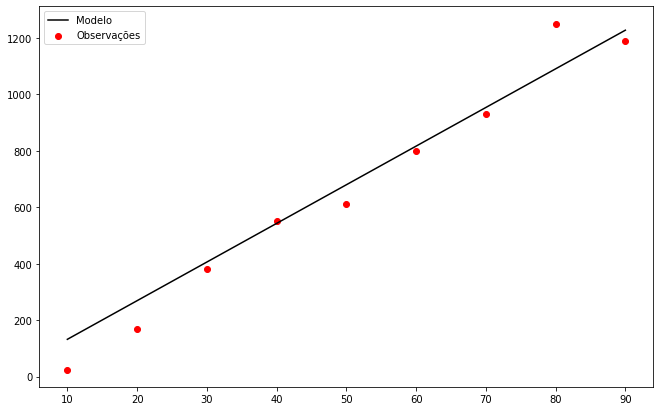

In [8]:
y_pred= predict(X, a, b)

fig, axe = plt.subplots(1, 1, figsize = (11,7))
axe.scatter(X, Y, color = 'red', label = 'Observações')
axe.plot(X, y_pred, color = 'black', label = 'Modelo')
axe.legend(loc= 'best')